# Seattle Traffic Accident Severity Prediction (Week 3)
## 1. Introduction
Traffic accident has risen to the 3rd major reason of mortality among countries by 2020, which also has a negative impact on economical society. Citizens feel lack of security when they drive on roads, cross the street or even walk along the pedestrain. Vehicle manufactures have invested large amount of professionals and fundings to increase the quality of vehicles but all these efforts have less contribution to traffic rushes. It is the time for government to make some actions in order to find out the main causes of traffic accidents. 
## 2. Business Problem
The purpose of this project is to analyze the collision dataset for the city of Seattle and find patterns and determinate key factors such as weather, light and road conditions, drug or alcohol influence, driver inattention to provide the best traffic accident severity prediction. It will use various analytical techniques and machine learning classification algorithms such as logistic regression, decision tree analysis, k-nearest-neighbors, support vector machine,etc.
## 3. Target Audience
This study can mainly help transportation secter governments improve traffic policies or update public facilities such as street lamp,  speed bumps at proper positions. Car rental or insurance companies are also among the target groups of this analysis because they can classify potentical customers and design different service content based on customers driving habits.

## 4. Data
Seattle Department of Transportation provides traffic accident cases from 2004 for almost 15 years to discover the reasons behind these collisions. The dataset contains all kinds of collisions in Seattle from 2004 to 2020. To predict the damage level of road accidents, the indicator 'SEVERITYCODE' is chosen as the dependent variable. Normally, the degree of collision climbs up from property damage Only collision injury to injury collision. Among dozens of attributes, this project concentrates on both nature and human factors which may lead to car accidents. Nature factors are made up by 'WEATHER','ROADCOND' and 'LIGHTCOND' which represents weather, road and view circumstance respectively. On the other hand, human factors usually reflects the status of drivers such as 'INATTENTIONIND','UNDERINFL', and 'SPEEDING' which shows the concentration of drivers mind, drug or alcohol influence and overspeed. All attributes involved in this projects are shown below.

| Attribute |Data type, length| Description |
| :--- | :--- | :--- |
| WEATHER | Text,300 | A description of the weather conditions during the time of the collision.
| ROADCOND | Text,300 | The condition of the road during the collision.
| LIGHTCOND | Text,300 | The light conditions during the collision.
| INATTENTIONIND | Text,1 | Whether or not collision was due to inattention.(Y/N)
| UNDERINFL | Text,10 | Whether or not a driver involved was under the influence of drugs or alcohol.
| SPEEDING | Text,1 | Whether or not speeding was a factor in the collison.(Y/N)

### 4.1 Data Source
The full dataset can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv).

### 4.2 Metadata
The metadata can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf).

### 4.3 Display the data
Load the raw dataset.

In [1]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-18 06:20:40--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  46.5MB/s   in 1.5s   

2020-09-18 06:20:41 (46.5 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [2]:
import pandas as pd
raw_data = pd.read_csv('Data-Collisions.csv',index_col='INCKEY',parse_dates=['INCDATE','INCDTTM'])
raw_data.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
INCKEY,,,,,,,,,,,,,,,,,,,,,
1307,2,-122.323148,47.703140,1,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
52200,1,-122.347294,47.647172,2,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
26700,1,-122.334540,47.607871,3,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
1144,1,-122.334803,47.604803,4,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
17700,2,-122.306426,47.545739,5,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The dataset has 194673 records of car accidents with 37 indicators.

In [3]:
raw_data.shape

(194673, 37)

# 5. Methodology

Data Pre-processing techniques: The dataset is imputed by replacing NaN and missing values with most frequent values of the corresponding column. All the categorical values have been labeled by integers from 0 to n for each column. Time has been converted to categorial feature with 2 values i.e., daytime and night time.

The data is visualized for correlation. Negatively correlated features are selected to be dropped. Feature importance is plotted to visualize and only features with high importance are taken into consideration for predicting accident severity. The multi class label is converted to binary class by merging “Serious” and “Fatal” to Serious class.

Feature Selection: The dataset has 34 attributes describing the incident of an accident. There are mixed types of data such as continuous and categorical. Manually dropped few columns due to its inconsistency in values such as Accident ID, and Location ID. For selecting the best features, below functions are used from sklearn library.

SelectKBest: SelectKBest is a sci-kit learn library provides the k best features by performing statistical tests i.e., chi squared computation between two non-negative features. Using chi squared function filters out the features which are independent of target attribute.
Recursive Feature Elimination (RFE): RFE runs the defined model by trying out different possible combinations of features, and it removes the features recursively which are not impacting the class label. Logistic regression algorithm is used as a parameter for RFE to decide on features.

### 5.1 Data Cleansing
Firstly, we check the missing data in our dataset which has shown below. 'SEVERITYCODE' has no missing data while 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND' and 'SPEEDING' all have missing values to some extent, especially for 'INATTENTIONIND' and 'SPEEDING' which only have less than 30 thousand items in the whole dataset. We need to check these indexes further.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 1307 to 308220
Data columns (total 37 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null datetime64[ns, UTC]
INCDTTM           194673 non-null datetime64[ns]
JUNCTIONTYPE 

We transform the incident date into days of the week.

In [6]:
raw_data[['INCDATE','INCDTTM']].head()

,INCDATE,INCDTTM
INCKEY,,
1307,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00
52200,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00
26700,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00
1144,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00
17700,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00


In [7]:
#split incidents timestamps into two columns showing the date and time.
raw_data['DATE'] = raw_data['INCDTTM'].dt.date
raw_data['TIME'] = raw_data['INCDTTM'].dt.time
raw_data[['DATE','TIME']].head()

,DATE,TIME
INCKEY,,
1307,2013-03-27,14:54:00
52200,2006-12-20,18:55:00
26700,2004-11-18,10:20:00
1144,2013-03-29,09:26:00
17700,2004-01-28,08:04:00


In [8]:
#transform the date into the day of the week
raw_data['DAYOFWEEK'] = pd.to_datetime(raw_data['DATE']).dt.dayofweek

#Encoding weekend (0 = No, 1 = Yes)
raw_data['WEEKEND'] = raw_data['DAYOFWEEK'].apply(lambda x:1 if (x>3) else 0)
raw_data[['DAYOFWEEK','WEEKEND']].head()

,DAYOFWEEK,WEEKEND
INCKEY,,
1307,2,0
52200,2,0
26700,3,0
1144,4,1
17700,2,0


 'INATTENTIONIND' and 'SPEEDING' have less data because they only show the 'Y' which means the yes while ignoring the 'N' for no. So we have to fill in the missing data.

In [9]:
#The range of values for core indexes.
def range_values(indexes):
    for index in indexes:
        print('Index:{}'.format(index))
        print(raw_data[index].value_counts())
        print('--------------------------------------')

indexes = ['SEVERITYCODE','INATTENTIONIND','UNDERINFL','SPEEDING','WEATHER','ROADCOND','LIGHTCOND','WEEKEND','ADDRTYPE','COLLISIONTYPE']
range_values(indexes)

Index:SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
--------------------------------------
Index:INATTENTIONIND
Y    29805
Name: INATTENTIONIND, dtype: int64
--------------------------------------
Index:UNDERINFL
N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64
--------------------------------------
Index:SPEEDING
Y    9333
Name: SPEEDING, dtype: int64
--------------------------------------
Index:WEATHER
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
--------------------------------------
Index:ROADCOND
Dry               124510
Wet                47474
Unknown            150

In [10]:
#processing missing data
#Encoding inattention (0 = No, 1 = Yes)
#Encoding speeding(0 = No, 1 = Yes)
def transform_fill_missing_data(index):
    raw_data[index].replace(to_replace='Y',value=1,inplace=True)
    raw_data[index].fillna(0,inplace=True)

transform_fill_missing_data('INATTENTIONIND')
transform_fill_missing_data('SPEEDING')

#Encoding under the influence (0 = No, 1 = Yes)
raw_data['UNDERINFL'].replace(to_replace=['N','0','Y','1'],value=[0,0,1,1],inplace=True)

#Encoding weather conditions(1 = Clear, 2 = Overcast and Cloudy, 3 = Windy, 4 = Rain and Snow
raw_data['WEATHER'].replace(to_replace=["Clear","Raining","Overcast","Unknown",
                                        "Snowing","Other","Fog/Smog/Smoke",
                                        "Sleet/Hail/Freezing Rain","Blowing Sand/Dirt",
                                        "Severe Crosswind","Partly Cloudy"],
                            value=[1,4,2,np.nan,4,np.nan,3,4,3,3,2],inplace=True)

#Encoding road conditions(1 = Dry, 2 = Mushy, 3 = Wet)
raw_data['ROADCOND'].replace(to_replace=["Dry","Wet","Unknown","Ice","Snow/Slush",
                                         "Other","Standing Water","Sleet/Hail/Freezing Rain",
                                         "Sand/Mud/Dirt","Oil"],
                             value=[1,3,np.nan,3,2,np.nan,3,3,2,2],inplace=True)

#Encoding light conditions(1 = Bright, 2 = Medium, 3 = Dark)
raw_data['LIGHTCOND'].replace(to_replace=["Daylight","Dark - Street Lights On","Unknown",
                                          "Dusk","Dawn","Dark - No Street Lights",
                                          "Dark - Street Lights Off","Other","Dark - Unknown Lighting"],
                              value=[1,2,np.nan,2,2,3,3,np.nan,3],inplace=True)

#Encoding collision types(1 = Not Running Cars, 2 = Corners, 3 = Sides, 4 = Front and Back)
raw_data['COLLISIONTYPE'].replace(to_replace=["Parked Car","Angles","Rear Ended","Other",
                                              "Sideswipe","Left Turn","Pedestrian",
                                             "Cycles","Right Turn","Head On"],
                                  value=["Not Running Cars","Corners","Front and Back",np.nan,
                                         "Sides","Corners","Not Running Cars",
                                         "Not Running Cars","Corners","Front and Back"],inplace=True)
range_values(indexes)


Index:SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
--------------------------------------
Index:INATTENTIONIND
0.0    164868
1.0     29805
Name: INATTENTIONIND, dtype: int64
--------------------------------------
Index:UNDERINFL
0.0    180668
1.0      9121
Name: UNDERINFL, dtype: int64
--------------------------------------
Index:SPEEDING
0.0    185340
1.0      9333
Name: SPEEDING, dtype: int64
--------------------------------------
Index:WEATHER
1.0    111135
4.0     34165
2.0     27719
3.0       650
Name: WEATHER, dtype: int64
--------------------------------------
Index:ROADCOND
1.0    124510
3.0     48798
2.0      1143
Name: ROADCOND, dtype: int64
--------------------------------------
Index:LIGHTCOND
1.0    116137
2.0     56911
3.0      2747
Name: LIGHTCOND, dtype: int64
--------------------------------------
Index:WEEKEND
0    112996
1     81677
Name: WEEKEND, dtype: int64
--------------------------------------
Index:ADDRTYPE
Block           126926
Inters

### 5.2 Basic Analysis
We explore the relations between accidents severity with these six attributes respectively,which shows below. The figures depict that human factors are more likely to cause injury-involved traffic accidents. For example, the possibility of serious car accidents caused by drunk or drug drivers are nearly 10 percentage point higher than self-disciplined people generally. On the contrary, nature factors do not influence the level of collisions as our common sense that bad circumstances properly contribute to casualties in road accidents. Even though the conditions deteriorate, the propotion of injury accidents remains steady or even declines, such as the light condition.

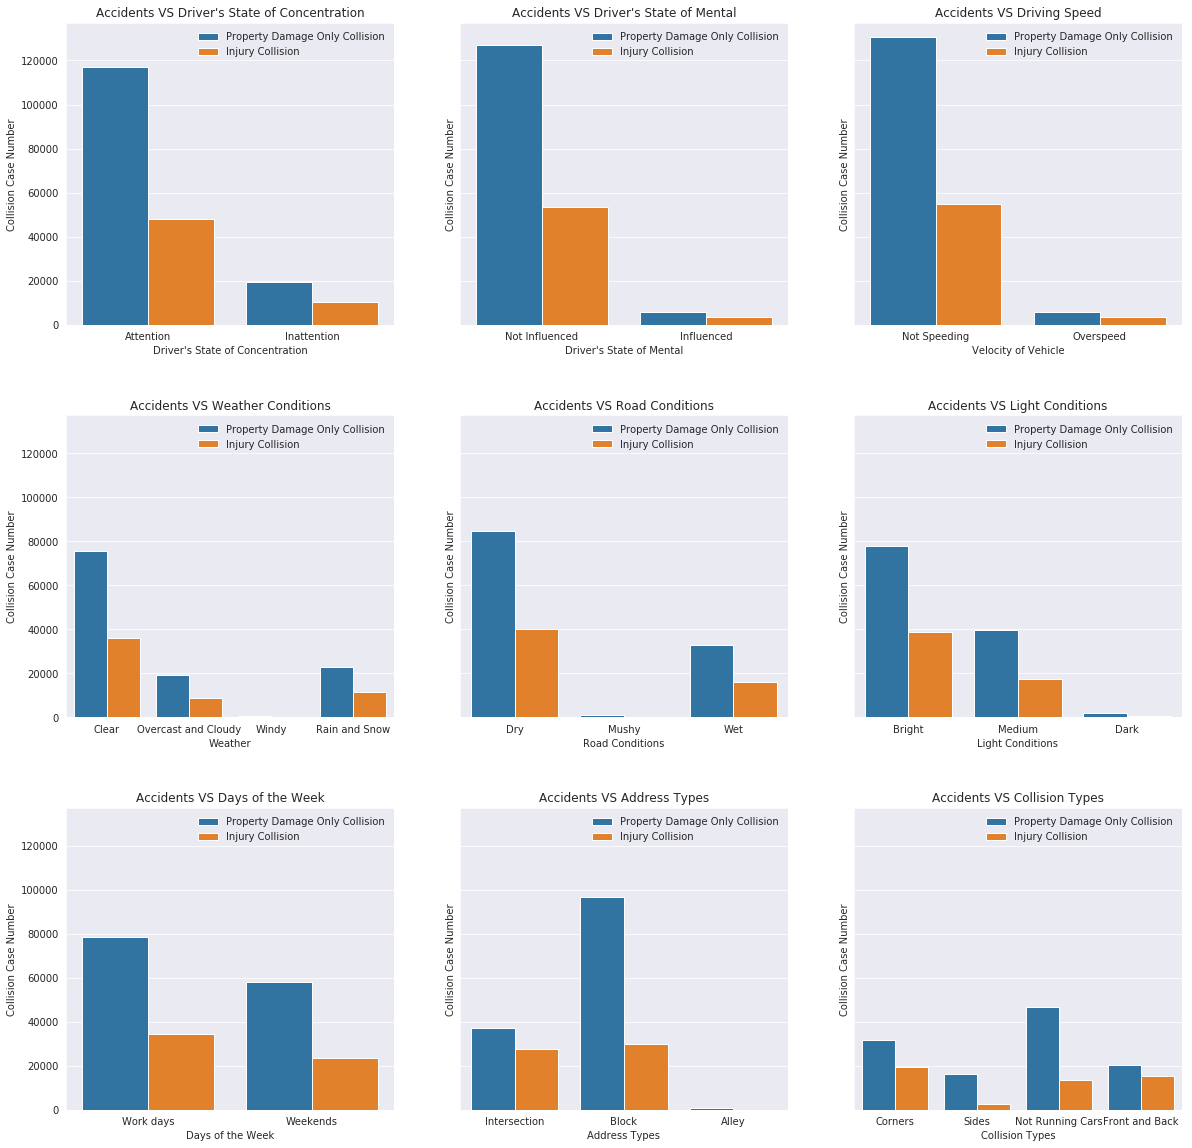

In [11]:
#draw a picture with 6 subplots
severity_level = ['Property Damage Only Collision','Injury Collision']
sns.set_style('darkgrid')
fig, axes = plt.subplots(3, 3, figsize=(20, 20), sharey=True)
fig.subplots_adjust(hspace = 0.3)

fig_inattention = sns.countplot(ax=axes[0,0],x='INATTENTIONIND',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Driver's State of Concentration", ylabel="Collision Case Number",
                    xticklabels=['Attention','Inattention'],title="Accidents VS Driver's State of Concentration")
fig_inattention.legend(severity_level,frameon=False)

fig_underinfluence = sns.countplot(ax=axes[0,1],x='UNDERINFL',hue='SEVERITYCODE',data=raw_data)
fig_underinfluence.set(xlabel="Driver's State of Mental", ylabel = "Collision Case Number",
                       xticklabels=['Not Influenced','Influenced'],title="Accidents VS Driver's State of Mental")
fig_underinfluence.legend(severity_level,frameon=False)

fig_speeding = sns.countplot(ax=axes[0,2],x='SPEEDING',hue='SEVERITYCODE',data=raw_data)
fig_speeding.set(xlabel="Velocity of Vehicle", ylabel = "Collision Case Number",
                 xticklabels=['Not Speeding','Overspeed'],title="Accidents VS Driving Speed")
fig_speeding.legend(severity_level,frameon=False)

fig_inattention = sns.countplot(ax=axes[1,0],x='WEATHER',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Weather", ylabel = "Collision Case Number",
                    xticklabels=['Clear','Overcast and Cloudy','Windy','Rain and Snow'],title="Accidents VS Weather Conditions")
fig_inattention.legend(severity_level,frameon=False)

fig_inattention = sns.countplot(ax=axes[1,1],x='ROADCOND',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Road Conditions", ylabel = "Collision Case Number",
                    xticklabels=['Dry','Mushy','Wet'],title="Accidents VS Road Conditions")
fig_inattention.legend(severity_level,frameon=False)

fig_inattention = sns.countplot(ax=axes[1,2],x='LIGHTCOND',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Light Conditions", ylabel = "Collision Case Number",
                    xticklabels=['Bright','Medium','Dark'],title="Accidents VS Light Conditions")
fig_inattention.legend(severity_level,frameon=False)

fig_inattention = sns.countplot(ax=axes[2,0],x='WEEKEND',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Days of the Week", ylabel = "Collision Case Number",
                    xticklabels=['Work days','Weekends'],title="Accidents VS Days of the Week")
fig_inattention.legend(severity_level,frameon=False)

fig_inattention = sns.countplot(ax=axes[2,1],x='ADDRTYPE',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Address Types", ylabel = "Collision Case Number",
                    title="Accidents VS Address Types")
fig_inattention.legend(severity_level,frameon=False)

fig_inattention = sns.countplot(ax=axes[2,2],x='COLLISIONTYPE',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Collision Types", ylabel = "Collision Case Number",
                    title="Accidents VS Collision Types")
fig_inattention.legend(severity_level,frameon=False)

plt.show()

In [12]:
#calculate the percentage of accident severity types under the influence of indicators
def factor_influence_percentage(indexes):
    for index in indexes[1:]:
        print(raw_data.groupby([index])['SEVERITYCODE'].value_counts(normalize=True))
        print('-----------------------------------------')
    
factor_influence_percentage(indexes)

INATTENTIONIND  SEVERITYCODE
0.0             1               0.710126
                2               0.289874
1.0             1               0.651166
                2               0.348834
Name: SEVERITYCODE, dtype: float64
-----------------------------------------
UNDERINFL  SEVERITYCODE
0.0        1               0.703340
           2               0.296660
1.0        1               0.609473
           2               0.390527
Name: SEVERITYCODE, dtype: float64
-----------------------------------------
SPEEDING  SEVERITYCODE
0.0       1               0.705099
          2               0.294901
1.0       1               0.621665
          2               0.378335
Name: SEVERITYCODE, dtype: float64
-----------------------------------------
WEATHER  SEVERITYCODE
1.0      1               0.677509
         2               0.322491
2.0      1               0.684404
         2               0.315596
3.0      1               0.678462
         2               0.321538
4.0      1         

In [ ]:
from sklearn.processing import LabelEncoder


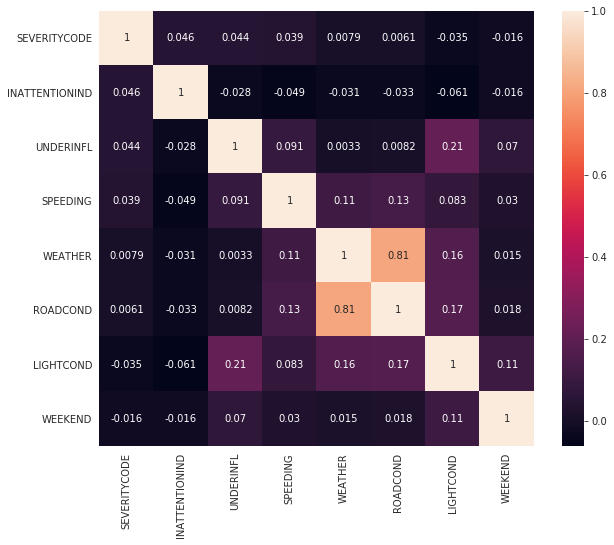

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(raw_data[indexes].corr(),annot=True,square=True)
plt.show()

### 5.3 Dataset Split
To avoid infornation leakage, we split the whole dataset into train and test subset before imputing missing data.

In [43]:
#remain 20% of items to test subset
from sklearn.model_selection import train_test_split

features_original = raw_data[indexes]

X = features_original.iloc[:,1:]
y = features_original.iloc[:,0]

X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### 5.4 Imputing missing data

In [35]:
print(features_original.isna().sum())
features_final = features_original.dropna(how='any')
features_final.shape

SEVERITYCODE          0
INATTENTIONIND        0
UNDERINFL          4884
SPEEDING              0
WEATHER           21004
ROADCOND          20222
LIGHTCOND         18878
WEEKEND               0
ADDRTYPE           1926
COLLISIONTYPE     28607
dtype: int64


(146883, 10)

### 5.3 Feature Selection

In [30]:
#Use chi-squre test to check whether the severity level is independent of original features.
#no null, no str
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2(raw_data[['INATTENTIONIND','UNDERINFL','SPEEDING','WEATHER','ROADCOND','LIGHTCOND','WEEKEND']].values,raw_data['SEVERITYCODE'].values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### 5.4 Modelling


In [ ]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## 6. Results

## 7. Discussion

## 8. Conclusion